In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as imread
import os
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import random
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D, Dropout
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

In [0]:
print(len([iq for iq in os.scandir('cats_and_dogs_filtered/train/cats/')]))

1000


In [0]:
test_datagen = ImageDataGenerator(rescale=1./255)
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(
        'cats_and_dogs_filtered/train/',
        target_size=(200, 200),
        batch_size=64,
        class_mode='binary')
test_generator = test_datagen.flow_from_directory(
        'cats_and_dogs_filtered/validation/',
        target_size=(200, 200),
        batch_size=64,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
photos, labels=list(), list()

In [0]:
# folder='training_set/dogs/'
# for i in range(9):
#   plt.subplot(330+1+i)
#   filename=folder+'dogs.'+str(370)+str(i)+'.jpg'
#   image=plt.imread(filename)
#   plt.imshow(image)
# plt.show()

folder='cats_and_dogs_filtered/train/dogs/'
for file in os.listdir(folder):
  if file!='.DS_Store':
    output=0.0
    photo=load_img(folder+file, target_size=(200, 200))
    photo=img_to_array(photo)
    photos.append(photo)
    labels.append(output)

In [0]:
# folder='cats_and_dogs_filtered/train'
# for i in range(9):
#   plt.subplt(330+1+i)
#   filename=folder+'cats.'+str(i)+'.jpg'
#   image=imread(filename)
#   plt.imshow(image)
# plt.show()

folder='cats_and_dogs_filtered/train/cats/'
for file in os.listdir(folder):
  if file!='.DS_Store':
    output=1.0
    photo=load_img(folder+file, target_size=(200, 200))
    photo=img_to_array(photo)
    photos.append(photo)
    labels.append(output)

photos=np.asarray(photos)
labels=np.asarray(labels)

In [0]:
photos_t, labels_t=list(), list()
folder='cats_and_dogs_filtered/validation/cats/'
for file in os.listdir(folder):
  if file!='.DS_Store':
    output=1.0
    photo=load_img(folder+file, target_size=(200, 200))
    photo=img_to_array(photo)
    photos_t.append(photo)
    labels_t.append(output)

folder='cats_and_dogs_filtered/validation/dogs/'
for file in os.listdir(folder):
  if file!='.DS_Store':
    output=0.0
    photo=load_img(folder+file, target_size=(200, 200))
    photo=img_to_array(photo)
    photos_t.append(photo)
    labels_t.append(output)

photos_t=np.asarray(photos_t)
labels_t=np.asarray(labels_t)

In [0]:
os.chdir('/content')

In [0]:
np.save('dogs_vs_cats_photos_train.npy', photos)
np.save('dogs_vs_cats_labels_train.npy', labels)
np.save('dogs_vs_cats_photos_test.npy', photos_t)
np.save('dogs_vs_cats_labels_test.npy', labels_t)

In [0]:
X_train=np.load('dogs_vs_cats_photos_train.npy')
y_train=np.load('dogs_vs_cats_labels_train.npy')
X_test=np.load('dogs_vs_cats_photos_test.npy')
y_test=np.load('dogs_vs_cats_labels_test.npy')
print(photos.shape, labels.shape)

(2000, 200, 200, 3) (2000,)


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 97, 97, 64)        18496     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 95, 95, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 47, 47, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 45, 45, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 22, 22, 128)      

In [0]:
import tensorflow as tf
data = tf.keras.utils.get_file(
    'cats_and_dogs_filetered.zip', 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip', untar=False, md5_hash=None, file_hash=None,
    cache_subdir='datasets', hash_algorithm='auto', extract=True,
    archive_format='auto', cache_dir=None
)

68608000/68606236 [==============================] - 1s 0us/step


In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2020-03-27 10:51:06--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 2a00:1450:4013:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  92.6MB/s    in 0.7s    

2020-03-27 10:51:07 (92.6 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
!unzip cats_and_dogs_filtered.zip

In [0]:
!cp -r cats_and_dogs_filtered /content

In [0]:
import tensorflow as tf 
tf.test.gpu_device_name() 

'/device:GPU:0'

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
model.summary()
#accuracy=50%

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
#accuracy=51%


In [0]:
model = Sequential()

initializers = {
    
}
model.add( 
    Conv2D(
        24, 5, input_shape=(200,200,3), 
        activation='relu', 
    )
)
model.add(MaxPooling2D(2) )
model.add( 
    Conv2D(
        48, 5, activation='relu', 
    )
)
model.add( MaxPooling2D(2) )
model.add( 
    Conv2D(
        96, 5, activation='relu', 
    )
)
model.add( Flatten() )
model.add( Dropout(0.2) )

model.add( Dense(
    1, activation='softmax',
    )
)

model.summary()

model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['acc'])

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 196, 196, 24)      1824      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 98, 98, 24)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 94, 94, 48)        28848     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 47, 47, 48)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 43, 43, 96)        115296    
_________________________________________________________________
flatten_8 (Flatten)          (None, 177504)            0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 177504)           

In [0]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
callbacks_list = [
                  EarlyStopping(monitor='val_loss', patience=10),
                  ModelCheckpoint(filepath='cat_dog1.h5', monitor='val_loss', save_best_only=True),
]

In [0]:
test_datagen = ImageDataGenerator(rescale=1./255,)
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(
        'cats_and_dogs_filtered/train/',
        target_size=(200, 200),
        batch_size=64,
        class_mode='binary')
test_generator = test_datagen.flow_from_directory(
        'cats_and_dogs_filtered/validation/',
        target_size=(200, 200),
        batch_size=64,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
os.environ["CUDA_VISIBLE_DEVICES"]="0"
with tf.device('/GPU:0'):
  history = model.fit_generator(train_generator, steps_per_epoch=len(train_generator), epochs=100, validation_data=test_generator, validation_steps=len(test_generator), callbacks=callbacks_list)

Epoch 1/100
32/32 [==============================] - 25s 768ms/step - loss: 7.9485 - acc: 0.5014 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 2/100
32/32 [==============================] - 19s 606ms/step - loss: 7.9938 - acc: 0.4986 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 3/100
32/32 [==============================] - 23s 730ms/step - loss: 7.9712 - acc: 0.5000 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 4/100
32/32 [==============================] - 23s 726ms/step - loss: 7.9485 - acc: 0.5014 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 5/100
32/32 [==============================] - 23s 724ms/step - loss: 7.9033 - acc: 0.5043 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 6/100
32/32 [==============================] - 23s 718ms/step - loss: 7.9485 - acc: 0.5014 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 7/100
32/32 [==============================] - 23s 730ms/step - loss: 7.9485 - acc: 0.5014 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 8/100
32/32 [==============================] - 23s 726ms

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])


In [0]:
datagen = ImageDataGenerator(rescale=1.0/255.0)
train_it = datagen.flow_from_directory('cats_and_dogs_filtered/train/',
	class_mode='binary', batch_size=64, target_size=(200, 200))
test_it = datagen.flow_from_directory('cats_and_dogs_filtered/validation/',
	class_mode='binary', batch_size=64, target_size=(200, 200))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
	validation_data=test_it, validation_steps=len(test_it), epochs=50, callbacks=callbacks_list)

Epoch 1/50
32/32 [==============================] - 9s 282ms/step - loss: 0.4682 - acc: 0.7807 - val_loss: 0.5673 - val_acc: 0.7060
Epoch 2/50
32/32 [==============================] - 8s 257ms/step - loss: 0.4229 - acc: 0.8164 - val_loss: 0.5731 - val_acc: 0.6940
Epoch 3/50
32/32 [==============================] - 8s 255ms/step - loss: 0.4143 - acc: 0.8133 - val_loss: 0.6076 - val_acc: 0.6850
Epoch 4/50
32/32 [==============================] - 8s 254ms/step - loss: 0.3926 - acc: 0.8364 - val_loss: 0.5661 - val_acc: 0.7000
Epoch 5/50
32/32 [==============================] - 8s 255ms/step - loss: 0.3795 - acc: 0.8423 - val_loss: 0.6673 - val_acc: 0.6380
Epoch 6/50
32/32 [==============================] - 8s 251ms/step - loss: 0.3758 - acc: 0.8398 - val_loss: 0.5789 - val_acc: 0.6930
Epoch 7/50
32/32 [==============================] - 8s 256ms/step - loss: 0.3571 - acc: 0.8461 - val_loss: 0.5755 - val_acc: 0.6970
Epoch 8/50
32/32 [==============================] - 8s 255ms/step - loss: 0.

Text(0.5, 0, 'number of epochs')

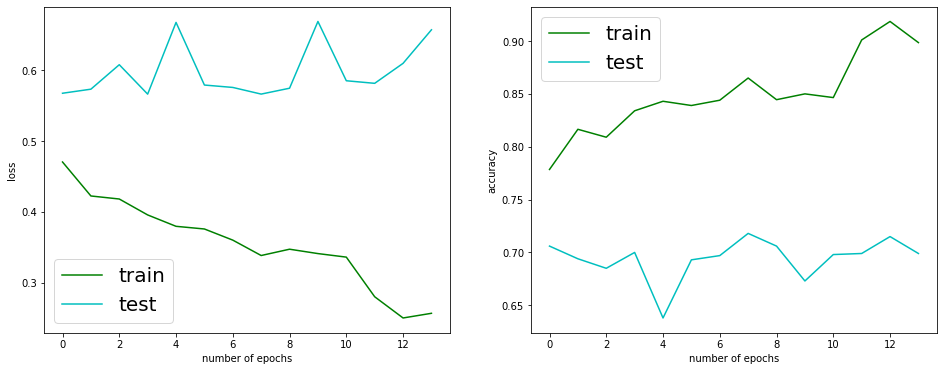

In [0]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
nepochs=len(history.history['loss'])
plt.plot(range(nepochs), history.history['loss'], 'g-', label='train')
plt.plot(range(nepochs), history.history['val_loss'], 'c-', label='test')
plt.legend(prop={'size':20})
plt.ylabel('loss')
plt.xlabel('number of epochs')
plt.subplot(1, 2, 2)
plt.plot(range(nepochs), history.history['acc'], 'g-', label='train')
plt.plot(range(nepochs), history.history['val_acc'], 'c-', label='test')
plt.legend(prop={'size':20})
plt.ylabel('accuracy')
plt.xlabel('number of epochs')

In [0]:
_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
print('> %.3f' % (acc * 100.0))

> 69.900
